# Task 2 - Landsat 8 false color image

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/olleholt/eds220-hw4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a false color image showing the fire scar of the Thomas fire in 2017. 
Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

## About the data

In this task you will use two datsets:

**First dataset**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

- [Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

- [How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

## File management
All your data files must be  inside a directory named 'data' **in your gitignore**. 

## Data access
All data is in the Canvas-week7-homework zip file.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

In [1]:
### ===== FINAL CODE =====

## Import libraries and functions

In [2]:
# import libraries and functions here

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for creating legends

import xarray as xr
import rioxarray as rioxr
import geopandas as gpd

from rasterio.features import rasterize #for rasterizing polygons
from shapely.geometry import box
from shapely.geometry import Point

## Import data

In [3]:
# your code here

# importing california fire perimeter data
ca = gpd.read_file('data/California_Fire_Perimeters_2017.shp')

#reading in the .nc file
landcover_fp = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
landcover = rioxr.open_rasterio(landcover_fp)

## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

In [4]:
# your code here

ca.head()

landcover.head()



<xarray.Dataset>
Dimensions:      (y: 5, x: 5, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 3.952e+06 3.952e+06 3.951e+06
  * x            (x) float64 1.213e+05 1.216e+05 1.218e+05 1.221e+05 1.224e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [5]:
# your code here

landcover = landcover.squeeze().drop('band')

## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


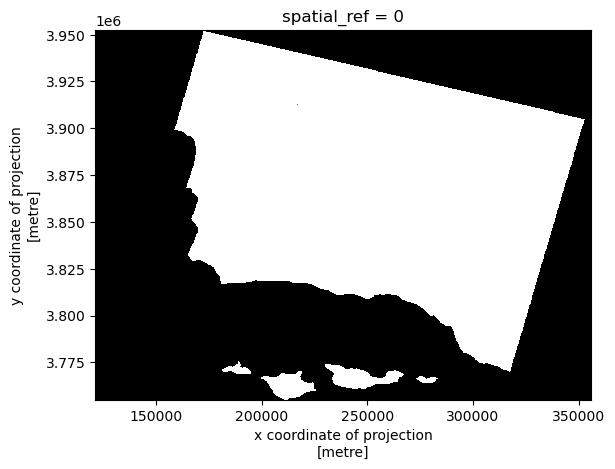

In [6]:
# your code here

landcover[['red','blue','green']].to_array().plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

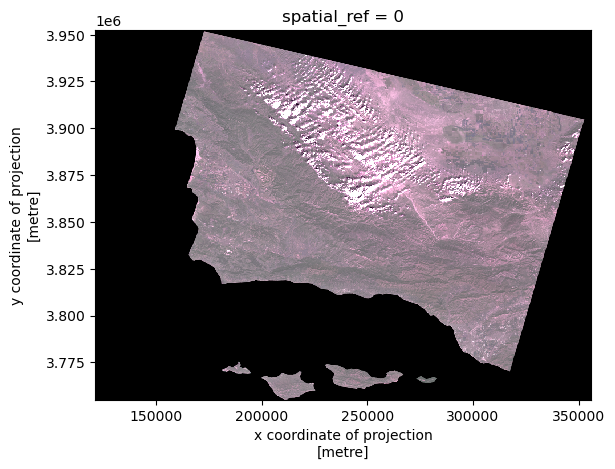

In [7]:
# 
landcover[['red','blue','green']].to_array().plot.imshow(robust = True)


## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

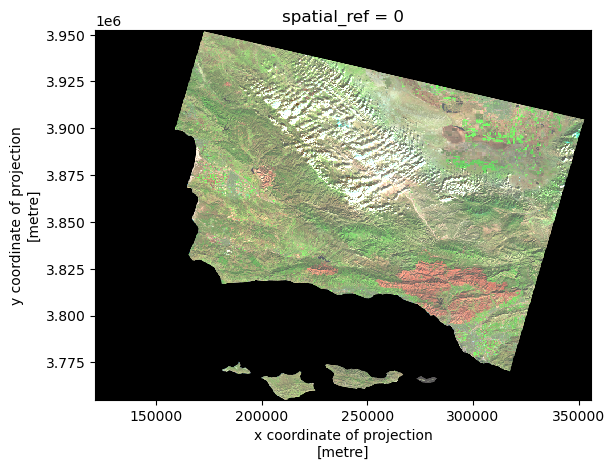

In [8]:
# your code here

landcover[['swir22','nir08','red']].to_array().plot.imshow(robust = True)


## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [9]:
# your code here

ca.crs == landcover.rio.crs

ca.crs

landcover.rio.crs

#set landcover crs to ca crs, crs='EPSG:3857'
ca = ca.to_crs(landcover.rio.crs)

thomas_fire = ca[ca['FIRE_NAME'] == 'THOMAS']

## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

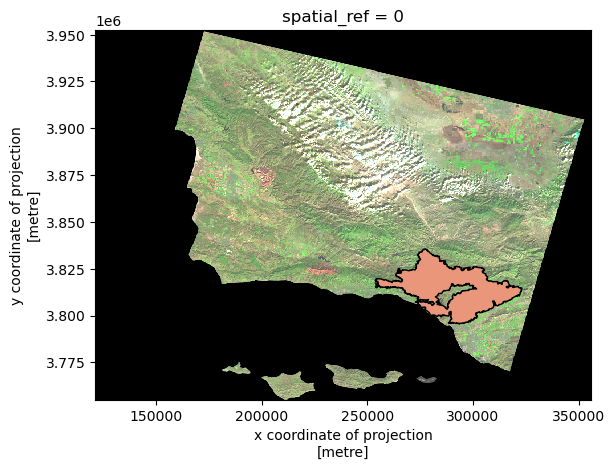

In [13]:
# your code here

fig, ax = plt.subplots()

#ax.axis('off')
ax.set_title('Title',  fontsize=20)

# --------------------------------------
thomas_fire.plot(ax=ax,
                color = "darksalmon",
                edgecolor= "black")
landcover[['swir22','nir08','red']].to_array().plot.imshow(robust = True) 


## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the plot you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.